## ใช้ OpenCV
OpenCV สามารถใช้สำหรับการปรับแต่งภาพ เช่น การหมุน การครอบตัด หรือการเลื่อน

In [3]:
import cv2
import numpy as np

def augment_image(image):
    augmented_images = []

    # 1. Flip แนวนอน
    flipped = cv2.flip(image, 1)  # 1 หมายถึง Flip แนวนอน
    augmented_images.append(flipped)

    # 2. Rotate
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle=15, scale=1.0)  # หมุน 15 องศา
    rotated = cv2.warpAffine(image, matrix, (width, height))
    augmented_images.append(rotated)

    # 3. Shift
    matrix = np.float32([[1, 0, 10], [0, 1, 10]])  # เลื่อน 10 พิกเซลในแนว X และ Y
    shifted = cv2.warpAffine(image, matrix, (width, height))
    augmented_images.append(shifted)

    # 4. Add Noise
    noise = np.random.randint(0, 50, (height, width), dtype='uint8')
    noisy_image = cv2.add(image, noise)
    augmented_images.append(noisy_image)

    return augmented_images

# ตัวอย่างการใช้งาน
image = cv2.imread("../../data/test_images/alphabet/A_2.png", cv2.IMREAD_GRAYSCALE)
augmented_images = augment_image(image)

for i, aug_img in enumerate(augmented_images):
    cv2.imshow(f"Augmented {i}", aug_img)

cv2.waitKey(0)
cv2.destroyAllWindows()




# ใช้ Keras
Keras มีเครื่องมือใน ImageDataGenerator สำหรับทำ Data Augmentation แบบง่าย ๆ และมีประสิทธิภาพ

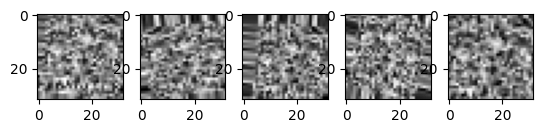

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# สร้าง ImageDataGenerator สำหรับ Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,        # หมุนภาพ ±15 องศา
    width_shift_range=0.1,    # เลื่อนในแนวนอนได้ 10%
    height_shift_range=0.1,   # เลื่อนในแนวตั้งได้ 10%
    shear_range=0.2,          # การบิดภาพ (Shear) 20%
    zoom_range=0.2,           # ซูมเข้า-ออก 20%
    horizontal_flip=True,     # Flip แนวนอน
    fill_mode='nearest'       # เติมขอบด้วยค่าที่ใกล้เคียง
)

# ตัวอย่างข้อมูลภาพ (Grayscale Image)
image = np.random.rand(32, 32, 1)  # จำลองภาพขนาด 32x32 พร้อม 1 Channel

# เพิ่ม Batch Dimension (เพื่อให้ Shape เป็น (batch_size, height, width, channels))
image = np.expand_dims(image, axis=0)

# สร้าง Augmented Images
for i, aug_img in enumerate(datagen.flow(image, batch_size=1)):
    plt.subplot(1, 5, i+1)
    plt.imshow(aug_img[0].squeeze(), cmap='gray')
    if i == 4:  # สร้าง 5 ภาพ
        break
plt.show()


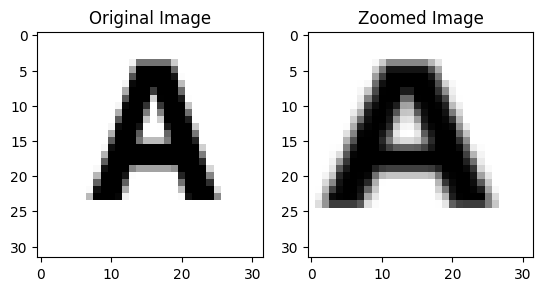

In [33]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

# สร้าง Pipeline สำหรับการซูมเข้าและซูมออก
augmentation_pipeline = A.Compose([
    A.RandomResizedCrop(height=32, width=32, scale=(0.5, 1.0), p=1.0)  # ซูมเข้าและซูมออก
])

# โหลดภาพต้นฉบับ
image_path = "../../data/test_images/alphabet/A_2.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)  # แปลงภาพเป็น RGB

# ทำ Augmentation
augmented = augmentation_pipeline(image=image)['image']

# แสดงภาพต้นฉบับและภาพที่ซูม
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(augmented)
plt.title("Zoomed Image")
plt.show()

